# 1. Appels d'offres de soutien aux énergies renouvelables

Deux enjeux façonnent l'avenir énergétique mondial : le changement climatique et l'accroissement de la demande d'énergie. Qui plus est, le Ministère de la transition écologique a fixé l'objectif ambitieux de zéro émission nette de carbone d'ici 2050. C'est pour cette raison que des entreprises comme Total Energies ont décidé d'investir résolument dans la transition vers des sources d'énergie renouvelables

Afin de mieux cerner l'état actuel du marché de l'énergie renouvelable, j'ai entrepris d'étudier des appels d'offres qui y sont liés. Pour ce faire, je dispose d'un jeu de données contenant des données brutes issues des rapports de synthèse des appels d'offres de soutien aux énergies renouvelables publiés depuis 2017.

Dans ce cas précis, il s'agit de données synthétiques sur les appels d'offres dépouillés par la CRE depuis 2017 : nombre de plis dépouillés, de dossiers instruits, de dossiers que la CRE propose de retenir, la puissance cumulée de ces dossiers, leur prix moyen pondéré, les charges de service public de l'électricité correspondante, etc.

In [14]:
# Read in dataset
import pandas as pd

requests_for_proposal = pd.read_csv("data/CRE_Energies_Renouvellables/Synthese_AO.csv", sep=";", encoding="latin-1")
requests_for_proposal.sample(5)

,FILIERE,AVIS_JO,DATE_DEPOT_OFFRES,PERIODE,DATE_DELIBERATION_INSTRUCTION,NB_PLIS_DEPOSES,NB_PLIS_DEPOSES_DEDOUBLONNES,NB_DOSSIERS_INSTRUITS,NB_DOSSIERS_A_RETENIR,P_CUMULEE_DOSSIERS_DEPOSES,P_CUMULEE_DOSSIERS_A_RETENIR,PRIX_MOYEN_DOSSIERS_A_RETENIR,CSPE_ANNEE1,CSPE_CONTRAT,DUREE_CONTRAT
25,Autoconsommation 1,30/07/2016,02/02/2017,P2,02/03/2017,317,277,88,62,"84,5","20,5","20,5","0,6","5,5",10
11,Photovoltaïque bâtiment,09/09/2016,06/11/2017,P3,20/07/2017,998,947,342,283,572,159,85,10,"179,4",20
16,Photovoltaïque bâtiment,09/09/2016,05/07/2019,P8,05/09/2019,394,348,348,268,"169,6","129,4","91,87","7,2",131,20
56,ZNI 2,11/06/2019,11/12/2020,P4,28/01/2021,275,222,111,67,"162,8","59,8","98,6","3,9","58,9",20
53,ZNI 2,11/06/2019,13/12/2019,P1,30/01/2020,62,61,41,32,"109,5","44,3",101,"5,3","90,6",20


In [18]:
# Statistiques descriptives sur le jeu de données
requests_for_proposal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   FILIERE                        58 non-null     object
 1   AVIS_JO                        58 non-null     object
 2   DATE_DEPOT_OFFRES              58 non-null     object
 3   PERIODE                        54 non-null     object
 4   DATE_DELIBERATION_INSTRUCTION  58 non-null     object
 5   NB_PLIS_DEPOSES                58 non-null     object
 6   NB_PLIS_DEPOSES_DEDOUBLONNES   58 non-null     object
 7   NB_DOSSIERS_INSTRUITS          58 non-null     int64 
 8   NB_DOSSIERS_A_RETENIR          58 non-null     int64 
 9   P_CUMULEE_DOSSIERS_DEPOSES     58 non-null     object
 10  P_CUMULEE_DOSSIERS_A_RETENIR   58 non-null     object
 11  PRIX_MOYEN_DOSSIERS_A_RETENIR  58 non-null     object
 12  CSPE_ANNEE1                    58 non-null     object
 13  CSPE_CO

# 2. Nettoyage de données



En observant au hasard différentes valeurs des colonnes `NB_PLIS_DEPOSES` et `NB_PLIS_DEPOSES_DEDOUBLONNES`, on constate que certaines valeurs contiennent un espace comme séparateur de milliers. Ce caractère spécial empêche cependant que ces colonnes soient considérées par pandas comme purement numériques rendant ainsi difficiles de futurs calculs mathématiques sur ces colonnes.

De même, toutes les colonnes de `P_CUMULEE_DOSSIERS_DEPOSES` à `CSPE_CONTRAT` (colonnes 9 à 13 en commençant l'indexage à 0) contiennent des virgules comme séparateur de décimale. Python fonctionnant selon la convention américaine de notation des nombres (et ne reconnaissant donc pas la virgule comme séparateur de décimale mais le point) ne considère pas ces colonnes non plus comme purement numériques. Pour y remédier, je remplacerai donc les virgules dans ce jeu de données par des points.

In [21]:
# Remplacement des espaces
cols_espaces = ["NB_PLIS_DEPOSES", "NB_PLIS_DEPOSES_DEDOUBLONNES"]
for col in cols_espaces:
    requests_for_proposal[col] = requests_for_proposal[col].apply(lambda x: x.replace(' ', ''))
    
# Remplacement des virgules
for i in range(9, 14):
    requests_for_proposal.iloc[:, i] = requests_for_proposal.iloc[:, i].apply(lambda x: x.replace(',', '.'))
    
requests_for_proposal.sample(5)

,FILIERE,AVIS_JO,DATE_DEPOT_OFFRES,PERIODE,DATE_DELIBERATION_INSTRUCTION,NB_PLIS_DEPOSES,NB_PLIS_DEPOSES_DEDOUBLONNES,NB_DOSSIERS_INSTRUITS,NB_DOSSIERS_A_RETENIR,P_CUMULEE_DOSSIERS_DEPOSES,P_CUMULEE_DOSSIERS_A_RETENIR,PRIX_MOYEN_DOSSIERS_A_RETENIR,CSPE_ANNEE1,CSPE_CONTRAT,DUREE_CONTRAT
20,Photovoltaïque ZNI avec stockage,15/12/2016,16/06/2017,NaN,20/07/2017,220,212,73,67,295,63,113.6,10,178,20
16,Photovoltaïque bâtiment,09/09/2016,05/07/2019,P8,05/09/2019,394,348,348,268,169.6,129.4,91.87,7.2,131,20
14,Photovoltaïque bâtiment,09/09/2016,05/11/2018,P6,13/12/2018,262,249,248,243,114.8,111.6,84.7,5,84,20
44,Éolien terrestre,28/04/2017,01/07/2020,P6,03/09/2020,50,48,24,23,686,258,59.7,9.2,163,20
15,Photovoltaïque bâtiment,09/09/2016,08/03/2019,P7,25/04/2019,418,400,380,380,223.2,207.3,96,12,224,20


# 3. Correction des types de données

Comme constaté dans les sections 1 et 2, certaines colonnes ne possèdent pas le bon type de données en raison des caractères spéciaux (espace et virgule) qu'elles comportaient. Étant donné que ces colonnes seront utilisées par la suite au cours des analyses, il est temps de corriger leur typage

In [23]:
# Conversion de NB_PLIS_DEPOSES et NB_PLIS_DEPOSES_DEDOUBLONNES au type de données int
for col in cols_espaces:
    requests_for_proposal[col] = requests_for_proposal[col].astype('int64')
    
# Conversion de P_CUMULEE_DOSSIERS_DEPOSES, P_CUMULEE_DOSSIERS_A_RETENIR, PRIX_MOYEN_DOSSIERS_A_RETENIR, CSPE_ANNEE1 et CSPE_CONTRAT
# au type de données float
for i in range(9, 14):
    requests_for_proposal.iloc[:, i] = requests_for_proposal.iloc[:, i].astype('float')
    
# Vérification des types du dataframe
requests_for_proposal.dtypes

FILIERE                           object
AVIS_JO                           object
DATE_DEPOT_OFFRES                 object
PERIODE                           object
DATE_DELIBERATION_INSTRUCTION     object
NB_PLIS_DEPOSES                    int64
NB_PLIS_DEPOSES_DEDOUBLONNES       int64
NB_DOSSIERS_INSTRUITS              int64
NB_DOSSIERS_A_RETENIR              int64
P_CUMULEE_DOSSIERS_DEPOSES       float64
P_CUMULEE_DOSSIERS_A_RETENIR     float64
PRIX_MOYEN_DOSSIERS_A_RETENIR    float64
CSPE_ANNEE1                      float64
CSPE_CONTRAT                     float64
DUREE_CONTRAT                      int64
dtype: object

# 4. Exploration des filières impliquées dans les appels d'offres

Les sources d'énergie renouvelables peuvent être réparties en plusieurs catégories, notamment solaire, éolienne ou encore hydraulique.

Différentes filières de production d'énergie tirent partie de ces sources d'énergie renouvelables au sein des appels d'offres. Cela amène donc à se poser certaines questions :

- Quelles sont les filères de production d'énergie impliquées dans ces appels d'offres ? Au nombre de combien sont-elles ?
- Quelle(s) filière(s) possède(nt) la plus grande part dans les appels d'offres ?
- Quelle est la filière la moins représentée ?

Dans cette section, j'apporte des réponses à ces questions

Nombre de filières de production d'énergie = 14


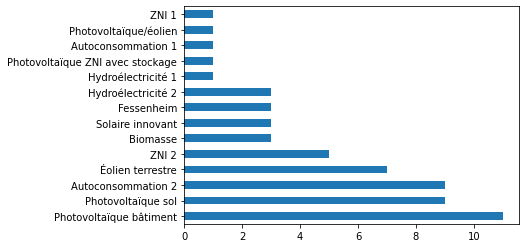

In [32]:
import matplotlib.pyplot as plt

# Nombre de filières de production d'énergie impliquées dans les appels d'offres
nb_filieres = len(requests_for_proposal["FILIERE"].unique())
print("Nombre de filières de production d'énergie =", nb_filieres)

# Comptage du nombre d'appels d'offres dans chaque filière
num_ao_par_filiere = requests_for_proposal["FILIERE"].value_counts()

# Classement des fréquences d'apparition des filières par ordre décroissant
sorted_num_ao_par_filiere = num_ao_par_filiere.sort_values(ascending=False)

num_ao_par_filiere.plot(kind='barh')
plt.show()

In [33]:
# Nombre d'appels d'offres par filière
sorted_num_ao_par_filiere

Photovoltaïque bâtiment             11
Autoconsommation 2                   9
Photovoltaïque sol                   9
Éolien terrestre                     7
ZNI 2                                5
Hydroélectricité 2                   3
Fessenheim                           3
Solaire innovant                     3
Biomasse                             3
ZNI 1                                1
Photovoltaïque/éolien                1
Autoconsommation 1                   1
Photovoltaïque ZNI avec stockage     1
Hydroélectricité 1                   1
Name: FILIERE, dtype: int64

On peut déjà constater que les panneaux photovoltaïques de bâtiment sont la filière la plus récurrente tandis que les zones interconnectées 1 (ZNI 1) représentent la filière la moins courante dans les appels d'offres

Cependant, 3 appels d'offres font référence à Fessenheim, ce qui laisse penser à la centrale nucléaire de Fessenheim. Celle-ci était le terrain de rénovations dans le cadre de la transition écologique, on peut supposer qu'il s'agit de blabla sur Wikipedia

Les énergies primaires impliquées dans ces appels d'offres sont solaires, éoliennes, hydrauliques et bioénergiques. On peut ainsi créer un deuxième tableau dans lequel on inclue ces sources d'énergie afin ensuite de déterminer la part de chacune (%) dans les appels d'offres

L'autoconsommation occupe également une place prépondérante dans les appels d'offres. La France n'était à l'origine pas très favorable à cette forme de consommation. Cependant, la donne semble avoir changé